In [1]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

# Convergence of a series
Consider the geometric series
$$S=\sum_{n=0}^{\infty}\left(\frac{1}{2}\right)^{n-1}=2$$
and its partial sums
$$S_k=\sum_{n=0}^{k}\left(\frac{1}{2}\right)^{n-1}.$$
Let's look at how $S_k$ approaches $S$ with growing $k$.

In [2]:
# define partial sum function
def S_k(k):
    return np.sum([0.5**(n-1) for n in range(1,k+1)])

# set values of k
k_values = np.arange(1,6)

# set iterator
iterator = 1

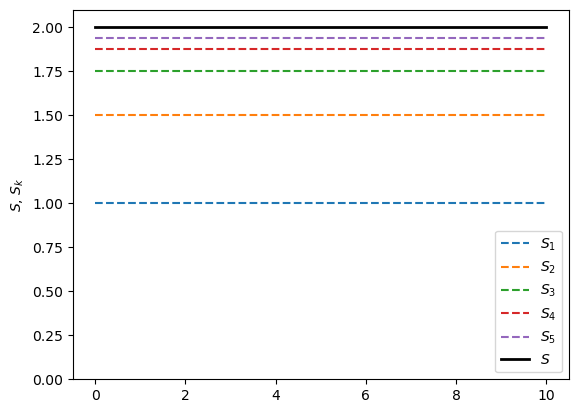

In [7]:
for i, k in enumerate(k_values[:iterator]):
    plt.plot([0,10], [S_k(k),S_k(k)], '--', label=r'$S_{'+str(k)+r'}$')
plt.plot([0,10], [2,2], label='$S$', color='black', lw=2)

plt.ylim([0,2.1])
plt.ylabel('$S$, $S_k$')
plt.xticks()
plt.legend(loc=4, ncol=1)

iterator = min([len(k_values), iterator+1])

# Convergence of a power series

Let's consider the power series
$$S(x)=\sum_{n=0}^{\infty}x^{n-1}=\frac{1}{1-r}$$
and its partial sums
$$S_k(x)=\sum_{n=0}^{k}x^{n-1}.$$
Let's look at how $S_k(x)$ approaches $S(x)$ with growing $k$.

In [162]:
# define partial sum function
def S_kx(k):
    function_x = lambda x: np.sum([x**(n-1) for n in range(1, int(k)+1)])
    return function_x

# define limit function
limitfunction = lambda x: 1/(1-x)

# set values of k
k_values = np.arange(1,6)

# set values of x
xvals = np.linspace(0.01, 0.99, 100)

iterator = 1

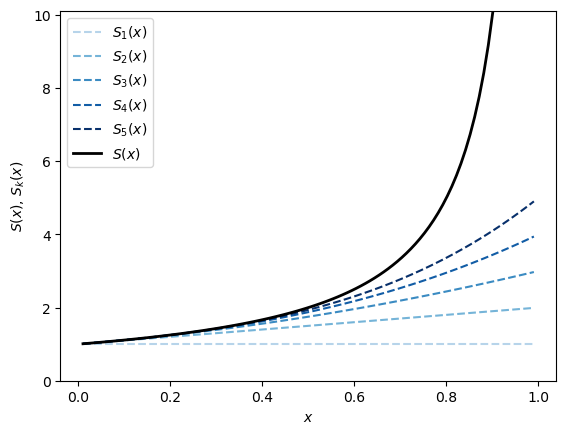

In [169]:
for i, k in enumerate(k_values[:iterator]):
    plt.plot(xvals, [S_kx(k)(x) for x in xvals], '--', label=r'$S_{'+str(int(k))+r'}(x)$')
plt.plot(xvals, [limitfunction(x) for x in xvals], label='$S(x)$', color='black', lw=2)

plt.ylim([0,10.1])
plt.ylabel('$S(x)$, $S_k(x)$')
plt.xlabel('$x$')
plt.legend(loc=2, ncol=1)

iterator = min(len(k_values), iterator+1)

# Convergence of the Taylor series for $sin(x)$

Consider the function $f(x)=sin(x)$ and its Taylor series $$\sum_{n=0}^\infty (-1)^n\frac{x^{2n+1}}{(2n+1)!}$$.

The corresponding Taylor polynomials are
$$T_k(x) = \sum_{n=0}^k (-1)^n\frac{x^{2n+1}}{(2n+1)!}$$

Let's look at how $T_k(x)$ approaches $sin(x)$ with growing $k$.

In [196]:
# define partial sum function
def T_kx(k):
    function_x = lambda x: np.sum([(-1)**n*x**(2*n+1)/np.math.factorial(2*n+1) for n in range(0, int(k))])
    return function_x

# define limit function
limitfunction = lambda x: np.sin(x)

# set values of k
k_values = np.arange(1,6)

# set values of x
xvals = np.linspace(-10, 10, 100)

# colors for lines
#blues = matplotlib.colormaps['Blues'] #matplotlib.cm.get_cmap('Blues')
#colors = [blues(v) for v in np.linspace(0.3,1,len(k_values))]

iterator = 1

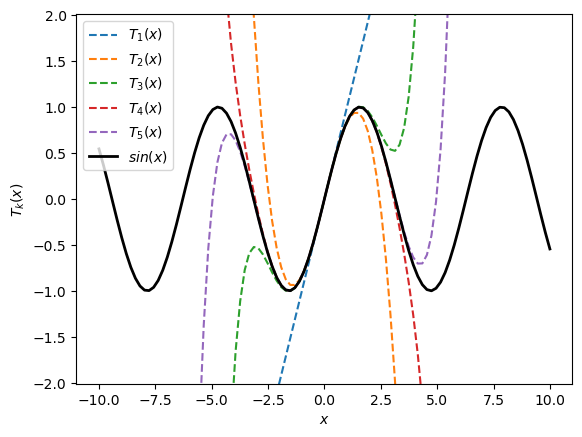

In [201]:
for i, k in enumerate(k_values[:iterator]):
    plt.plot(xvals, [T_kx(k)(x) for x in xvals], '--', label=r'$T_{'+str(int(k))+r'}(x)$')
plt.plot(xvals, [limitfunction(x) for x in xvals], label='$sin(x)$', color='black', lw=2)

plt.ylim([-2.01,2.01])
plt.ylabel('$T_k(x)$')
plt.xlabel('$x$')
plt.legend(loc=2, ncol=1)

iterator = min(len(k_values), iterator+1)

# What happens outside the interval of convergence?

Consider the function $f(x)=ln(1+x)$ and its Taylor series $$\sum_{n=0}^\infty (-1)^n\frac{x^{n}}{n},$$
for which the interval of convergence is $I=(-1,1)$.

The corresponding Taylor polynomials are
$$T_k(x) = \sum_{n=0}^k (-1)^n\frac{x^{n}}{n}$$

Let's look at how $T_k(x)$ inside and outside the interval of convergence.

In [248]:
# define partial sum function
def T_kx(k):
    function_x = lambda x: np.sum([(-1)**(n+1)*x**n/n for n in range(1, int(k+1))])
    return function_x

# define limit function
limitfunction = lambda x: np.log(1+x)

# set values of k
k_values = [1,2,3,4,5,6,20,21]

# set values of x
xvals = np.linspace(-2,2,101)
iterator = 1

C:\Users\alice\AppData\Local\Temp\ipykernel_20400\2247639850.py:7: RuntimeWarning: invalid value encountered in log
  limitfunction = lambda x: np.log(1+x)
C:\Users\alice\AppData\Local\Temp\ipykernel_20400\2247639850.py:7: RuntimeWarning: divide by zero encountered in log
  limitfunction = lambda x: np.log(1+x)


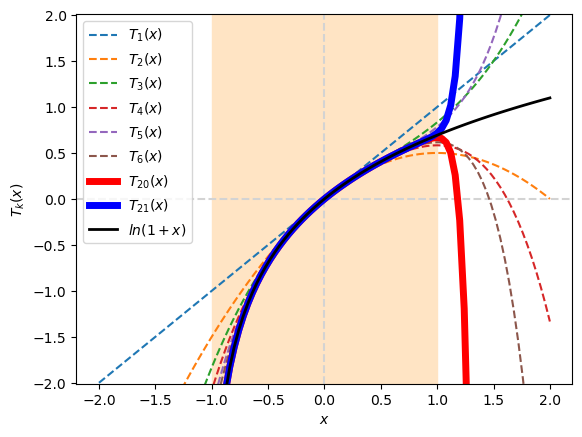

In [256]:
# add interval and grid
plt.fill_betweenx(y=[-2.01,2.01], x1=-1,x2=1, color='bisque')
plt.axvline(x=0, ls='--', color='lightgray')
plt.axhline(y=0, ls='--', color='lightgray')


for i, k in enumerate(k_values[:iterator]):
    if k < 10:
        plt.plot(xvals, [T_kx(k)(x) for x in xvals], '--', label=r'$T_{'+str(int(k))+r'}(x)$')
    else:
        plt.plot(xvals, [T_kx(k)(x) for x in xvals], '-', lw=5, color=['red','blue'][i % 2],
                 label=r'$T_{'+str(int(k))+r'}(x)$')
        
plt.plot(xvals, [limitfunction(x) for x in xvals], label='$ln(1+x)$', color='black', lw=2)

plt.ylim([-2.01,2.01])
plt.ylabel('$T_k(x)$')
plt.xlabel('$x$')
plt.legend(loc=2, ncol=1)

iterator = min(len(k_values), iterator+1)